In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import sys


In [121]:
filename = 'courseRecSys.xlsx'
splitProp = 0.95

In [122]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [123]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
    df["avg"] = df.mean(axis = 0, skipna=True, numeric_only=True)
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = df.drop(["avg"],axis =1)
    return df

In [124]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


change 0.5 to average of ratings of that user

In [125]:
all_users = df

In [126]:
train,test = train_test_split(df,train_size=splitProp, random_state=42,shuffle = True)

In [127]:
df.shape

(162, 25)

In [128]:
test.shape

(9, 25)

In [129]:
# df.isna().sum()

In [130]:
courses = df.columns
# courses

In [131]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [132]:
# def visualize(point):
#     wcss = []  #Within Cluster Sum of Squares
#     for number_of_clusters in range(1, 15): 
#         kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
#         kmeans.fit(df[core_courses]) 
#         wcss.append(kmeans.inertia_)
#     ks = np.arange(1,15,1)
#     plt.plot(ks, wcss)
#     plt.axvline(point, linestyle='--', color='r')
#     return wcss

In [133]:
# visualize(5)

In [134]:
def K_means(df, num_clusters, iters):
    np_dat = df.to_numpy()
    # Initialize the centroids
    range_min = np.min(np_dat, axis = 0)
    range_max = np.max(np_dat, axis = 0)
    curr_centroids = []
    np.random.seed(75)
    for i in range(num_clusters):
        curr_centroids.append(np.random.uniform(range_min, range_max))
    clusters = {}
    for it in range(iters):
        # Repopulate clusters
        clusters.clear()
        for j in range(np_dat.shape[0]):
            datapoint = np_dat[j]
            min = sys.maxsize
            min_index = 10
            for k in range(num_clusters):
                dist = np.linalg.norm(curr_centroids[k] - datapoint)
                if(dist < min):
                    min = dist
                    min_index = k
            if(clusters.get(str(min_index)) == None):
                clusters[str(min_index)] = []
            clusters[str(min_index)].append(j)
        
        # Recalculate Centroids
        new_centroids = []
        for k in range(num_clusters):
            key = str(k)
            if(clusters.get(key) == None): 
                n_centr = curr_centroids[k]
                #n_centr = np.random.uniform(range_min, range_max)
            else: n_centr = np.mean(np_dat[np.array(clusters[key])], axis = 0)
            new_centroids.append(n_centr)
        
        #if((np.not_equal(new_centroids, curr_centroids).any()) != True ): break
        curr_centroids = new_centroids
        #print(it)
    return clusters


In [135]:
def get_clustered_df(df,num_clusters):
    cluster_dict = K_means(df[core_courses], num_clusters, 50)
    print(cluster_dict)
    clustered_df =[]
    arr = df.to_numpy()
    for k in range(num_clusters):
        key = str(k)
        centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
        clustered_df.append(centr)
    return clustered_df

In [136]:
clustered_df = get_clustered_df(df,10)

{'7': [0, 17, 33, 41, 70, 117, 157], '9': [1, 3, 15, 20, 31, 42, 48, 49, 50, 55, 61, 71, 74, 75, 78, 86, 88, 102, 106, 109, 147, 152, 159], '0': [2, 59, 63, 107, 125, 143, 145, 156], '4': [4, 7, 27, 29, 30, 35, 40, 44, 60, 64, 67, 84, 89, 93, 98, 101, 120, 132, 135, 136, 142, 151, 154, 158, 160], '2': [5, 8, 10, 11, 13, 14, 16, 18, 19, 21, 23, 24, 25, 34, 37, 43, 45, 46, 51, 53, 54, 57, 58, 62, 65, 68, 69, 72, 76, 77, 81, 85, 87, 92, 96, 97, 103, 113, 116, 119, 121, 124, 128, 129, 130, 131, 133, 137, 138, 139, 141, 144, 148, 149, 150, 153], '8': [6, 38, 39, 52, 66, 73, 83, 90, 105, 110, 123, 126, 140], '6': [9, 82, 127, 161], '1': [12, 28, 32, 47, 56, 80, 91, 94, 104, 108, 115, 118, 134, 146], '3': [22, 26, 99, 111, 114], '5': [36, 79, 95, 100, 112, 122, 155]}


In [137]:
df = pd.DataFrame(clustered_df, columns = courses)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.900000,0.202500,0.868750,0.906250,0.887500,0.700833,0.652823,0.567524,0.521580,0.488374,...,0.213269,0.198158,0.219903,0.192434,0.171528,0.456841,0.631589,0.549143,0.661655,0.555449
1,0.753571,0.228571,0.750000,0.096429,0.914286,0.908094,0.842512,0.731443,0.549325,0.665284,...,0.186374,0.116541,0.091002,0.179229,0.086310,0.175676,0.304539,0.331408,0.205695,0.484020
2,0.890893,0.860536,0.803036,0.784107,0.911786,0.827559,0.816084,0.700205,0.573415,0.628471,...,0.286703,0.291316,0.268711,0.273038,0.237822,0.377799,0.449959,0.460564,0.473721,0.512363
3,0.240000,0.040000,0.200000,0.600000,0.920000,0.840000,0.540000,0.480000,0.429055,0.441398,...,0.150923,0.147789,0.128883,0.140921,0.100833,0.390946,0.401083,0.453971,0.437973,0.506538
4,0.894000,0.450000,0.176000,0.332000,0.822000,0.754533,0.590903,0.524412,0.527750,0.556719,...,0.200738,0.158232,0.143106,0.152737,0.080667,0.252757,0.404975,0.347177,0.290243,0.419487
5,0.975714,0.940000,0.648571,0.851429,0.278571,0.800952,0.674655,0.702871,0.692182,0.700999,...,0.260440,0.287519,0.109944,0.359962,0.157738,0.279247,0.478958,0.409980,0.369981,0.390385
6,0.600000,0.850000,0.875000,0.150000,0.200000,0.826665,0.805647,0.435049,0.679479,0.501748,...,0.188654,0.184737,0.161104,0.176151,0.126042,0.238682,0.276354,0.317464,0.297466,0.383173
7,0.303767,0.835714,0.780336,0.910361,0.855411,0.631316,0.572167,0.620411,0.581299,0.480934,...,0.208242,0.190226,0.153432,0.167763,0.148611,0.370174,0.557767,0.502347,0.469015,0.536355
8,0.976923,0.961538,0.983846,0.046154,0.969231,0.892308,0.830769,0.509238,0.780406,0.708230,...,0.365740,0.345020,0.296863,0.303036,0.205556,0.199324,0.535240,0.393571,0.229470,0.638807
9,0.663043,0.743478,0.156522,0.839130,0.795652,0.783478,0.613816,0.579582,0.507669,0.597324,...,0.252843,0.309108,0.267307,0.254291,0.151510,0.344301,0.494538,0.435913,0.437368,0.587347


In [138]:
def svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    print(A.shape)
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [139]:
U,sigma,VT = svd(np.array(clustered_df))

(10, 25)


In [140]:
U.shape,sigma.shape,VT.shape

((10, 10), (10,), (10, 25))

In [141]:
k=6

In [142]:
def reduced_svd(k,A):
    U,sigma,VT = svd(A)
    reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
    return reduced_matrix


In [143]:
reduced_matrix = reduced_svd(k,np.array(clustered_df))
type(clustered_df)

(10, 25)


list

In [144]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

In [145]:
def CosineSimilarity(vec1,vec2):
    return np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec1))


new user with just core courses ratings. Now we need elective courses

In [146]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]
kritin = [0,0,0,0,0]

In [193]:
core_courses

['Data Structures and Algorithms',
 'Computer Architecture\n',
 'Discrete Mathematics\n',
 'Economics',
 'Programming-2']

In [147]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [155]:
def findSimilarUsers(reduced_matrix,new_user):
    similarity_user_cosines = []
    for user in reduced_matrix:
        # print(user)
        theta = CosineSimilarity(user[0:5],new_user)
        similarity_user_cosines.append(theta)
    return similarity_user_cosines
    

In [149]:
reduced_matrix.shape

(10, 25)

In [152]:
all_users = all_users.to_numpy()
type(all_users)


numpy.ndarray

In [156]:
min = findSimilarUsers(all_users,new_user)
min

[0.7336860670194005,
 0.8244897959183675,
 0.5272206303724927,
 0.8929001203369433,
 0.9019607843137254,
 0.7347670250896058,
 0.525,
 0.7462686567164178,
 0.623826714801444,
 0.6260162601626016,
 0.6929895245769541,
 0.7835256493366178,
 0.6373626373626374,
 0.6972789115646256,
 0.639871382636656,
 0.8,
 0.7455830388692579,
 0.691860465116279,
 0.7424242424242424,
 0.7046263345195729,
 0.77602523659306,
 0.6030150753768845,
 0.8272251308900522,
 0.62953995157385,
 0.5774647887323943,
 0.6809815950920246,
 0.9299363057324842,
 0.8451327433628318,
 0.8251748251748252,
 0.2,
 0.8142076502732241,
 0.8287895310796072,
 0.6090909090909091,
 0.7599999999999999,
 0.7556390977443608,
 0.6826086956521739,
 0.6445993031358886,
 0.7016393442622951,
 0.525,
 0.5960057952899064,
 0.8571428571428571,
 0.6821192052980133,
 0.7499999999999999,
 0.7046979865771812,
 0.818181818181818,
 0.5399999999999999,
 0.6375321336760926,
 0.6399999999999999,
 0.7666666666666667,
 1.0944881889763782,
 0.625,
 0.642

In [ ]:
cos = CosineSimilarity(reduced_matrix[0][0:5],new_user)
cos

0.6440642057031719

In [ ]:
find_cluster(reduced_matrix,kritin)#testing

3

In [ ]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [ ]:
def find_elective_ratings_from_og(reduced_matrix,original,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = original[cluster,5:]
    return elective_ratings


In [ ]:
elective_ratings = find_elective_ratings(reduced_matrix,kritin)

In [ ]:
elective_ratings2 = find_elective_ratings_from_og(reduced_matrix,np.array(clustered_df),kritin)

# ranking of electives

In [162]:
all_users.shape,len(min)


((162, 25), 162)

In [166]:
d={tuple(all_users[i]):min[i] for i in range(len(all_users))}


In [167]:
def getClosestUsers(min,all_users):
    users_ranked = sorted(all_users,key=lambda x:d[tuple(x)])
    return users_ranked

In [176]:
for i in range(5):
    print(i)

0
1
2
3
4


In [189]:
users_ranked = getClosestUsers(min,all_users)
user_rating = np.zeros(25)
for i in range(5):
    user_rating = np.add(users_ranked[i],user_rating)
user_rating = user_rating/5
user_rating

array([1.        , 0.2       , 0.8       , 0.        , 0.6       ,
       1.        , 1.        , 0.4       , 0.3       , 0.3       ,
       0.9       , 0.2       , 0.4       , 0.3       , 0.5       ,
       0.2       , 0.        , 0.        , 0.2       , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30217949])

In [ ]:
def get_electives_ranked(courses,elective_ratings):
    d={courses[5:][i]: elective_ratings[i] for i in range(20)}

    elective_ranked = sorted(courses[5:], key=lambda x : -d[x])
    return elective_ranked  

In [192]:
user_elective_ranked=get_electives_ranked(courses,user_rating)
user_elective_ranked

['Machine Learning\n',
 'Software Production Engineering\n',
 'Computer Graphics\n',
 'Digital CMOS VLSI Design ',
 'Visual Recognition\n',
 'Reinforcement Learning',
 'High level synthesis and optimization of Digital Circuits ',
 'Data Visualization\n',
 'ASIC design ',
 'Programming Languages\n',
 'Cloud Computing\n',
 'VLSI Architecture Design\n',
 'Mathematics For Machine Learning\n',
 'System design with FPGA ',
 'Digital Sociology ',
 'Techno-economics of networks ',
 'Natural Language Processing\n',
 'Privacy in the Digital Age',
 'Technology Ethics and AI ',
 'The Web and the Mind ']

In [ ]:
elective_ranked = get_electives_ranked(courses,elective_ratings)


In [ ]:
elective_ranked

['Machine Learning\n',
 'Software Production Engineering\n',
 'Programming Languages\n',
 'Cloud Computing\n',
 'Visual Recognition\n',
 'Mathematics For Machine Learning\n',
 'Data Visualization\n',
 'The Web and the Mind ',
 'Reinforcement Learning',
 'Technology Ethics and AI ',
 'Techno-economics of networks ',
 'Privacy in the Digital Age',
 'Natural Language Processing\n',
 'Digital Sociology ',
 'Computer Graphics\n',
 'Digital CMOS VLSI Design ',
 'ASIC design ',
 'System design with FPGA ',
 'VLSI Architecture Design\n',
 'High level synthesis and optimization of Digital Circuits ']

In [ ]:
elective_ranked2 = get_electives_ranked(courses,elective_ratings2)
elective_ranked2

['Machine Learning\n',
 'Software Production Engineering\n',
 'Programming Languages\n',
 'Data Visualization\n',
 'Cloud Computing\n',
 'Mathematics For Machine Learning\n',
 'The Web and the Mind ',
 'Visual Recognition\n',
 'Technology Ethics and AI ',
 'Reinforcement Learning',
 'Techno-economics of networks ',
 'Natural Language Processing\n',
 'Privacy in the Digital Age',
 'Digital Sociology ',
 'Computer Graphics\n',
 'Digital CMOS VLSI Design ',
 'System design with FPGA ',
 'VLSI Architecture Design\n',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ']

change the nan values to average of the item instead of average of user ratings. -- done

in find elective rating find the ratings from the clustered matrix and not reduced matrix.

In [ ]:
def train_recommendations(X_train,num_clusters):
    clustered_df=get_clustered_df(X_train,num_clusters)
    reduced_matrix=reduced_svd(6,np.array(clustered_df))
    return reduced_matrix

In [ ]:
def train_recommendations(X_train,num_clusters):
    clustered_df=get_clustered_df(X_train,num_clusters)
    reduced_matrix=reduced_svd(6,np.array(clustered_df))
    return reduced_matrix

In [ ]:
def test_recommendations(X_test,reduced_matrix):
    pred = []
    for i in range(len(X_test)):
        new_user = X_test[i]
        elective_ratings = find_elective_ratings(reduced_matrix,new_user[:5])
        elective_ranked = get_electives_ranked(courses,elective_ratings)
        pred.append(elective_ratings)
    return pred


In [ ]:
reduced_matrix = train_recommendations(train,10)

{'2': [0, 1, 5, 10, 12, 16, 17, 19, 21, 26, 27, 29, 34, 37, 42, 43, 44, 47, 48, 52, 54, 56, 57, 69, 70, 84, 86, 88, 90, 91, 94, 98, 99, 100, 102, 108, 111, 112, 113, 115, 119, 122, 124, 128, 131, 132, 134, 135, 139, 140, 142, 143, 145, 150, 151], '4': [2, 6, 9, 24, 35, 46, 51, 61, 63, 74, 77, 78, 87, 96, 110, 120, 121, 136], '9': [3, 11, 15, 22, 28, 40, 65, 67, 68, 80, 95, 109, 116, 126, 127, 129, 130, 137, 144, 147, 148, 149, 152], '8': [4, 13, 20, 30, 32, 45, 73, 81, 85, 104, 105, 107, 118, 138], '0': [7, 23, 25, 39, 64, 93, 101, 114, 123, 125, 133, 141], '1': [8, 18, 41, 53, 55, 66, 71, 75, 97, 106], '6': [14, 33, 49, 146], '3': [31, 38, 59, 83], '5': [36, 58, 62, 72, 79, 89], '7': [50, 60, 76, 82, 92, 103, 117]}
(10, 25)


In [ ]:
pred=test_recommendations(test.to_numpy(),reduced_matrix)

In [ ]:
def get_error(pred,test):
    mse =[]
    for i in range(len(pred)):
        mse.append((EuclDist(pred[i],test[i][5:])))

    return sum(mse)/len(mse)

In [ ]:
get_error(pred,test.to_numpy())

1.375241208468509

In [ ]:
# for i in pred:
#     elective_ranked = get_electives_ranked(courses,i)
#     print(elective_ranked)
#     print("*****************")

https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

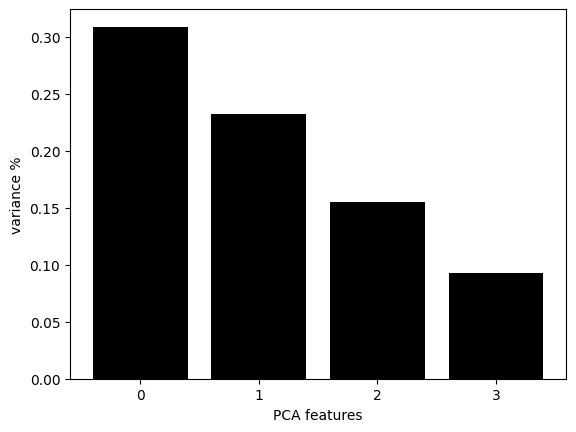

In [ ]:
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(df)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 3')

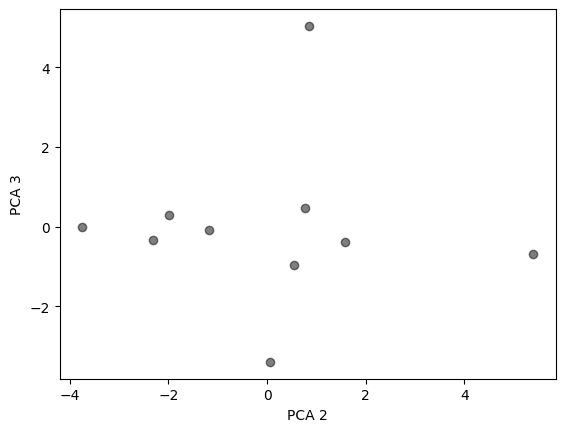

In [ ]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.5, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')


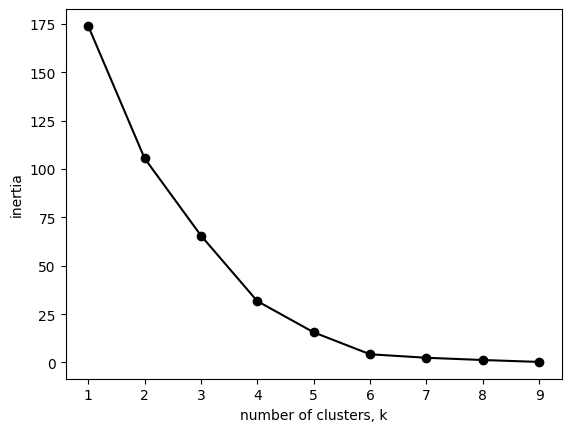

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()